# Train Test Splits, Cross Validation, Linear Regression (LR)

## Data: Housing Prices in Ames, Iowa

The dataset is in "../data/Ames_Housing_Sales.csv"

Load the data and study the structure

## Question 1

In [80]:
import pandas as pd

In [81]:
DATA_DIR_PATH = "../data"

In [82]:
file_path = DATA_DIR_PATH + "/Ames_Housing_Sales.csv"

In [83]:
# load the data
data = pd.read_csv(file_path)
print(data.shape)

(1379, 80)


As we can see, the dataset has 1379 rows (meaning data points) and 80 attributes (features, column).

In [84]:
data.dtypes.value_counts()

object     43
float64    21
int64      16
Name: count, dtype: int64

We have 43 objects (meaning string or categorical features)
21 floats, and 16 integers features.

## Question 2

In [85]:
data

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,SalePrice
0,856.0,854.0,0.0,NaN,3,1Fam,TA,No,706.0,0.0,...,0.0,Pave,8,856.0,AllPub,0.0,2003,2003,2008,208500.0
1,1262.0,0.0,0.0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,0.0,Pave,6,1262.0,AllPub,298.0,1976,1976,2007,181500.0
2,920.0,866.0,0.0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,0.0,Pave,6,920.0,AllPub,0.0,2001,2002,2008,223500.0
3,961.0,756.0,0.0,NaN,3,1Fam,Gd,No,216.0,0.0,...,0.0,Pave,7,756.0,AllPub,0.0,1915,1970,2006,140000.0
4,1145.0,1053.0,0.0,NaN,4,1Fam,TA,Av,655.0,0.0,...,0.0,Pave,9,1145.0,AllPub,192.0,2000,2000,2008,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1374,953.0,694.0,0.0,NaN,3,1Fam,NaN,NaN,0.0,0.0,...,0.0,Pave,7,953.0,AllPub,0.0,1999,2000,2007,175000.0
1375,2073.0,0.0,0.0,NaN,3,1Fam,TA,No,790.0,163.0,...,0.0,Pave,7,1542.0,AllPub,349.0,1978,1988,2010,210000.0
1376,1188.0,1152.0,0.0,NaN,4,1Fam,Gd,No,275.0,0.0,...,0.0,Pave,9,1152.0,AllPub,0.0,1941,2006,2010,266500.0
1377,1078.0,0.0,0.0,NaN,2,1Fam,TA,Mn,49.0,1029.0,...,0.0,Pave,5,1078.0,AllPub,366.0,1950,1996,2010,142125.0


In [86]:
import numpy as np

In [87]:
mask = data.dtypes == object

categorical_cols = data.columns[mask].tolist()

In [88]:
print(categorical_cols)

['Alley', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'CentralAir', 'Condition1', 'Condition2', 'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd', 'Fence', 'FireplaceQu', 'Foundation', 'Functional', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'Heating', 'HeatingQC', 'HouseStyle', 'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig', 'LotShape', 'MSZoning', 'MasVnrType', 'MiscFeature', 'Neighborhood', 'PavedDrive', 'PoolQC', 'RoofMatl', 'RoofStyle', 'SaleCondition', 'SaleType', 'Street', 'Utilities']


In [89]:
print(f"Len of categorical_cols: {len(categorical_cols)}")

Len of categorical_cols: 43


In [90]:
num_ohc_cols = (data[categorical_cols].nunique() - 1).sum()


print(f"Num of one-hot encoded cols: {num_ohc_cols}")

Num of one-hot encoded cols: 204


In [91]:
print(data[categorical_cols].nunique())

Alley             2
BldgType          5
BsmtCond          3
BsmtExposure      4
BsmtFinType1      5
BsmtFinType2      6
BsmtQual          4
CentralAir        2
Condition1        9
Condition2        8
Electrical        5
ExterCond         4
ExterQual         4
Exterior1st      14
Exterior2nd      16
Fence             4
FireplaceQu       5
Foundation        6
Functional        7
GarageCond        5
GarageFinish      3
GarageQual        5
GarageType        6
Heating           6
HeatingQC         5
HouseStyle        8
KitchenQual       4
LandContour       4
LandSlope         3
LotConfig         5
LotShape          4
MSZoning          5
MasVnrType        3
MiscFeature       4
Neighborhood     25
PavedDrive        3
PoolQC            3
RoofMatl          8
RoofStyle         6
SaleCondition     6
SaleType          9
Street            2
Utilities         2
dtype: int64


## Question 3

In [92]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [93]:
# make copy of the data and then create a df where all categorical columns are one-hot encoded
data_ohc = data.copy()

In [94]:
label_encoder = LabelEncoder()
one_hot_encoder = OneHotEncoder()

In [95]:
ohc_cols = data[categorical_cols].nunique().index

for col in ohc_cols:
    data_copy = label_encoder.fit_transform(data_ohc[col]).astype(int)

    # remove the original column
    data_ohc = data_ohc.drop(columns=col)

    new_data = one_hot_encoder.fit_transform(data_copy.reshape(-1, 1))

    n_cols = new_data.shape[1]

    col_names = ["_".join([col, str(x)]) for x in range(n_cols)]

    new_df = pd.DataFrame(new_data.toarray(), columns=col_names)

    data_ohc = pd.concat([data_ohc, new_df], axis=1)

In [96]:
new_df

,Utilities_0,Utilities_1
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
1374,1.0,0.0
1375,1.0,0.0
1376,1.0,0.0
1377,1.0,0.0


In [97]:
data_ohc

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,SaleType_3,SaleType_4,SaleType_5,SaleType_6,SaleType_7,SaleType_8,Street_0,Street_1,Utilities_0,Utilities_1
0,856.0,854.0,0.0,3,706.0,0.0,1,0,150.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1,1262.0,0.0,0.0,3,978.0,0.0,0,1,284.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,920.0,866.0,0.0,3,486.0,0.0,1,0,434.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,961.0,756.0,0.0,3,216.0,0.0,1,0,540.0,272.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
4,1145.0,1053.0,0.0,4,655.0,0.0,1,0,490.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1374,953.0,694.0,0.0,3,0.0,0.0,0,0,953.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1375,2073.0,0.0,0.0,3,790.0,163.0,1,0,589.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1376,1188.0,1152.0,0.0,4,275.0,0.0,0,0,877.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1377,1078.0,0.0,0.0,2,49.0,1029.0,1,0,0.0,112.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [98]:
data.shape

(1379, 80)

In [99]:
# the difference between one-hot encoding and no encoding is in the number of features

print(f"one_hot_encoding={data_ohc.shape[1]} - original_encoding={data.shape[1]} = { data_ohc.shape[1] -data.shape[1]}")

one_hot_encoding=295 - original_encoding=80 = 215


In [100]:
# now let's remove the string cols from the original data

data = data.drop(columns=categorical_cols)

print(data.shape)

(1379, 37)


## Question 4

In [101]:
from sklearn.model_selection import train_test_split

In [102]:
y_col = 'SalePrice'

feature_cols = [x for x in data.columns if x != y_col]

X_data = data[feature_cols]
y_data = data[y_col]

In [103]:
# split to train and test with 70-30

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=42)

In [104]:
# do the same for the one hot encoded data
feature_cols = [x for x in data_ohc.columns if x != y_col]
X_data_ohc = data_ohc[feature_cols]
y_data_ohc = data_ohc[y_col]

X_train_ohc, X_test_ohc, y_train_ohc, y_test_ohc = train_test_split(X_data_ohc, y_data_ohc, test_size=0.3, random_state=42)

In [105]:
# show the difference in shapes

(X_train.shape, X_train_ohc.shape)

((965, 36), (965, 294))

In [106]:
# compare the indices to make sure the are identical
bool((X_train_ohc.index == X_train.index).all())

True

In [107]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [108]:
LR_model = LinearRegression()

In [109]:
error_df = list() # store for errors

In [110]:
lr_model = LR_model.fit(X_train, y_train)

y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)

error_df.append(pd.Series({'train': np.log(mean_squared_error(y_train, y_train_pred)),
                           'test' : np.log(mean_squared_error(y_test,  y_test_pred))},
                           name='no enc'))

In [111]:
lr_model_ohc = LR_model.fit(X_train_ohc, y_train)

y_train_pred_ohc = lr_model_ohc.predict(X_train_ohc)
y_test_pred_ohc = lr_model_ohc.predict(X_test_ohc)

error_df.append(pd.Series({'train': np.log(mean_squared_error(y_train, y_train_pred_ohc)),
                           'test' : np.log(mean_squared_error(y_test,  y_test_pred_ohc))},
                           name='one hot enc'))

In [112]:
# assemble the results
error_df = pd.concat(error_df, axis=1)

In [113]:
error_df

,no enc,one hot enc
train,20.846816,19.576702
test,21.039668,22.810840


## Question 5

In [114]:
pd.options.mode.chained_assignment = None  # default='warn'

In [115]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler

In [116]:
scalers = {'standard': StandardScaler(),
           'minmax': MinMaxScaler(),
           'maxabs': MaxAbsScaler()}

In [117]:
training_test_sets = {
    'not_encoded': (X_train, y_train, X_test, y_test),
    'one_hot_encoded': (X_train_ohc, y_train_ohc, X_test_ohc, y_test_ohc)}

In [118]:
mask = X_train.dtypes == float
float_columns = X_train.columns[mask]

In [119]:
LR_model = LinearRegression()

In [120]:
errors = {}

In [121]:
for encoding_label, (_X_train, _y_train, _X_test, _y_test) in training_test_sets.items():
    for scaler_label, scaler in scalers.items():
        trainingset = _X_train.copy()  # copy because we dont want to scale this more than once.
        testset = _X_test.copy()
        trainingset[float_columns] = scaler.fit_transform(trainingset[float_columns])
        testset[float_columns] = scaler.transform(testset[float_columns])
        LR_model.fit(trainingset, _y_train)
        predictions = LR_model.predict(testset)
        key = encoding_label + ' - ' + scaler_label + 'scaling'

        errors[key] = np.log(mean_squared_error(_y_test, predictions))

errors = pd.Series(errors)

In [122]:
print(errors)

not_encoded - standardscaling        21.039668
not_encoded - minmaxscaling          21.039668
not_encoded - maxabsscaling          21.039668
one_hot_encoded - standardscaling    22.810840
one_hot_encoded - minmaxscaling      22.810840
one_hot_encoded - maxabsscaling      22.810840
dtype: float64


## Question 6

In [125]:
# use the two models to make prediction

# the two models are in lr_model, lr_model_ohc

lr_model = LinearRegression().fit(X_train, y_train)
y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)

lr_model_ohc = LinearRegression().fit(X_train_ohc, y_train_ohc)
y_train_pred_ohc = lr_model_ohc.predict(X_train_ohc)
y_test_pred_ohc = lr_model_ohc.predict(X_test_ohc)

predictions_lr = lr_model.predict(X_test)
predictions_lr_ohc = lr_model_ohc.predict(X_test_ohc)

# combine the predictions
predictions_combined = (predictions_lr + predictions_lr_ohc) / 2

In [126]:
# show the result now
from sklearn.metrics import mean_squared_error

# ensure y_test aligns with predictions (both were created from the same test split)
combined_mse = mean_squared_error(y_test, predictions_combined)
combined_error = np.log(combined_mse)

print(f"combined_error (log MSE): {combined_error:.6f}")

# compare to previous test errors stored in error_df (DataFrame with index ['train','test'])
print("\nprevious test errors (log MSE):")
print(error_df.loc['test'])

for col in error_df.columns:
    prev = error_df.loc['test', col]
    diff = combined_error - prev
    status = "better" if combined_error < prev else "worse or equal"
    print(f"\ncombined vs {col}: {status} (combined {combined_error:.6f} vs {prev:.6f}, diff={diff:.6f})")

combined_error (log MSE): 21.640087

previous test errors (log MSE):
no enc         21.039668
one hot enc    22.810840
Name: test, dtype: float64

combined vs no enc: worse or equal (combined 21.640087 vs 21.039668, diff=0.600419)

combined vs one hot enc: better (combined 21.640087 vs 22.810840, diff=-1.170753)


## Question 7

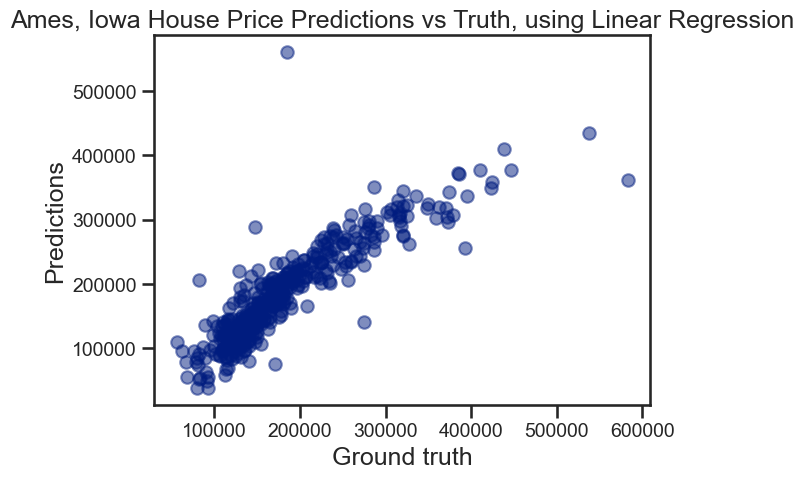

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')

ax = plt.axes()
# we are going to use y_test, y_test_pred
ax.scatter(y_test, y_test_pred, alpha=.5)

ax.set(xlabel='Ground truth',
       ylabel='Predictions',
       title='Ames, Iowa House Price Predictions vs Truth, using Linear Regression');
ax.tick_params(labelsize=14)

## Question 8

In [131]:
# do the same for the knn model
from sklearn.neighbors import KNeighborsClassifier

In [133]:
knn_model = KNeighborsClassifier(n_neighbors=5)

In [134]:
knn_model.fit(X_train, y_train)

\\eltiengdesc1.elta.co.il\users$\Dali0706\Desktop\repos\msc_courses\machine_learning_msc_course\.venv\Lib\site-packages\sklearn\utils\multiclass.py:213: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  y_type = type_of_target(y, input_name="y")


,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [135]:
# test the prediction vs the truth

knn_prediction = knn_model.predict(X_test)

knn_mse = mean_squared_error(knn_prediction, y_test)

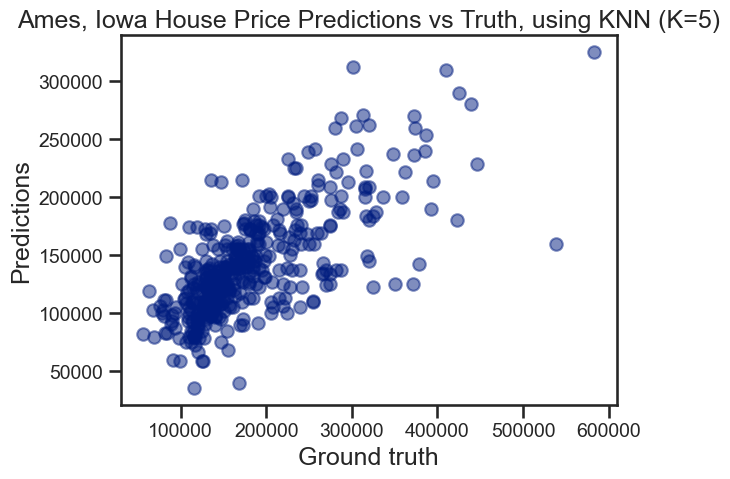

In [139]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')

ax = plt.axes()
# we are going to use y_test, y_test_pred
ax.scatter(y_test, knn_prediction, alpha=.5)

ax.set(xlabel='Ground truth',
       ylabel='Predictions',
       title='Ames, Iowa House Price Predictions vs Truth, using KNN (K=5)');
ax.tick_params(labelsize=14)

In [137]:
# Compare the result from knn to lr
# predictions_lr, knn_predict

mse_knn = mean_squared_error(y_test, knn_prediction)
log_mse_knn = np.log(mse_knn)

# ensure predictions_lr exists (from your LR model)
mse_lr = mean_squared_error(y_test, predictions_lr)
log_mse_lr = np.log(mse_lr)

In [ ]:
# print summary
print(f"LR    log MSE: {log_mse_lr:.6f}")
print(f"KNN   log MSE: {log_mse_knn:.6f}")

# simple comparison messages
if log_mse_knn < log_mse_lr:
    print("KNN performs better (lower log MSE) than LR on the test set.")
elif log_mse_knn > log_mse_lr:
    print("LR performs better (lower log MSE) than KNN on the test set.")
else:
    print("KNN and LR have equal log MSE on the test set.")


LR    log MSE: 21.039668
KNN   log MSE: 22.271697
LR performs better (lower log MSE) than KNN on the test set.
